In [1]:
!pip install langgraph

In [2]:
!pip show langgraph langchain-openai langchain-core

Name: langgraph
Version: 0.5.3
Summary: Building stateful, multi-actor applications with LLMs
Home-page: 
Author: 
Author-email: 
License-Expression: MIT
Location: C:\Users\souma\anaconda3\envs\rag\Lib\site-packages
Requires: langchain-core, langgraph-checkpoint, langgraph-prebuilt, langgraph-sdk, pydantic, xxhash
Required-by: 
---
Name: langchain-openai
Version: 0.3.19
Summary: An integration package connecting OpenAI and LangChain
Home-page: 
Author: 
Author-email: 
License: MIT
Location: C:\Users\souma\anaconda3\envs\rag\Lib\site-packages
Requires: langchain-core, openai, tiktoken
Required-by: langchain-pinecone
---
Name: langchain-core
Version: 0.3.68
Summary: Building applications with LLMs through composability
Home-page: 
Author: 
Author-email: 
License: MIT
Location: C:\Users\souma\anaconda3\envs\rag\Lib\site-packages
Requires: jsonpatch, langsmith, packaging, pydantic, PyYAML, tenacity, typing-extensions
Required-by: langchain, langchain-anthropic, langchain-community, langcha

In [3]:
#from langgraph.graph import Graph
from langgraph.graph import StateGraph, END
from dotenv import load_dotenv
load_dotenv()
from typing import TypedDict, List
import os

langgraph->orchestration->pipeline

langgraph->nodes,edges,State

node->funtions

edges-> connectivity between nodes(funtions)

In [81]:
"""   
from langchain_google_genai import GoogleGenerativeAIEmbeddings
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")
from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(model="gemini-1.5-pro")
"""   

'   \nfrom langchain_google_genai import GoogleGenerativeAIEmbeddings\nembeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")\nfrom langchain_google_genai import ChatGoogleGenerativeAI\nllm = ChatGoogleGenerativeAI(model="gemini-1.5-pro")\n'

#### Alternate with OpenAI:

In [4]:
from langchain_openai import OpenAIEmbeddings
embeddings = OpenAIEmbeddings(model="text-embedding-3-small")
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model="gpt-4o")

In [5]:
llm.invoke("hi").content

'Hello! How can I assist you today?'

In [72]:
"""   
def LLM(input):
    llm = ChatGoogleGenerativeAI(model="gemini-1.5-pro")
    response=llm.invoke(input).content
    return response
"""

'   \ndef LLM(input):\n    llm = ChatGoogleGenerativeAI(model="gemini-1.5-pro")\n    response=llm.invoke(input).content\n    return response\n'

#### Alternate with OpenAI:

In [ ]:
""" 
def LLM(input):
    llm = ChatOpenAI(model="gpt-4o")
    response=llm.invoke(input).content
    return response
""" 

## Function/Node 1:

In [6]:
# Define the state schema for StateGraph
class AgentState(TypedDict):
    messages: List[str]

In [7]:
from langchain_core.messages import HumanMessage

# Define the LLM node function
def LLM(state: AgentState) -> AgentState:
    # Initialize the LLM (e.g., OpenAI model)
    llm = ChatOpenAI(model="gpt-4o")
    
    # Extract the latest message from the state
    input_message = state["messages"][-1]
    
    # Call the LLM with the input message wrapped as a HumanMessage
    response = llm.invoke([HumanMessage(content=input_message)])
    
    # Extract the response content (string) from the LLM output
    llm_output = response.content
    
    # Return the updated state
    return {"messages": state["messages"] + [llm_output]}

In [73]:
""" 
def Counter_Token(input):
    token=input.split()
    token_number=len(token)
    response=f"total number of token in the generated output {token_number}"
    return response
 """    

' \ndef Counter_Token(input):\n    token=input.split()\n    token_number=len(token)\n    response=f"total number of token in the generated output {token_number}"\n    return response\n '

## Function/Node 2:

In [8]:
# Define the Token Counter node function
def Counter_Token(state: AgentState) -> AgentState:
    # Extract the latest message (LLM output)
    text = state["messages"][-1]
    
    # Simple token count (split by whitespace)
    token_count = len(text.split())
    
    # Return the updated state Verbose
    return {"messages": state["messages"] + [f"Total number of token in the generated output {token_count}"]}

## Create a Graph:

In [86]:
#workflow=Graph()

In [9]:
# Initialize the StateGraph
workflow = StateGraph(AgentState)

In [10]:
# Add nodes
workflow.add_node("MY LLM",LLM)

In [11]:
# Add nodes
workflow.add_node("Token Counter",Counter_Token)

In [12]:
# Add edges
workflow.add_edge("MY LLM", "Token Counter")

In [13]:
# Add edges
workflow.set_entry_point("MY LLM")
workflow.set_finish_point("Token Counter")

In [14]:
# Compile the workflow
app=workflow.compile()

In [15]:
from IPython.display import Image, display

In [16]:
app.get_graph()

Graph(nodes={'__start__': Node(id='__start__', name='__start__', data=RunnableCallable(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), 'MY LLM': Node(id='MY LLM', name='MY LLM', data=MY LLM(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), 'Token Counter': Node(id='Token Counter', name='Token Counter', data=Token Counter(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), '__end__': Node(id='__end__', name='__end__', data=None, metadata=None)}, edges=[Edge(source='MY LLM', target='Token Counter', data=None, conditional=False), Edge(source='__start__', target='MY LLM', data=None, conditional=False), Edge(source='Token Counter', target='__end__', data=None, conditional=False)])

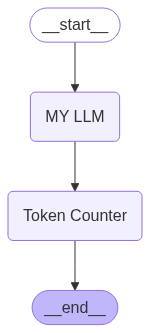

In [17]:
display(Image(app.get_graph().draw_mermaid_png())) 

This Graph represents the Orchestration or the Pipeline. Here Nodes will be replaced with Tools and Edges with the connections. Langgraph is an orchestration tool for creating Agents.

In [100]:
#app.invoke("what is a agentic ai explain me in very detailed manner?")

## Invoke Output:

In [18]:
# Corrected invoke call
result = app.invoke({"messages": ["what is a agentic ai explain me in very detailed manner?"]})
print(result["messages"][-1])  # Prints the final output (e.g., token count)

Total number of token in the generated output 478


## Stream Output:

In [19]:
for output in app.stream({"messages": ["what is a agentic ai explain me in very detailed manner?"]}):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value["messages"][-1])
        print("\n")

here is output from MY LLM
_______
Agentic AI refers to artificial intelligence systems that possess characteristics or capabilities typically associated with autonomous agents. These systems are designed to perform tasks with some level of independence, adaptability, and decision-making ability, often in dynamic and complex environments. Let's break down the concept in detail:

### Key Characteristics of Agentic AI

1. **Autonomy**:
   - Agentic AI systems can operate without human intervention for extended periods. This autonomy allows them to make decisions and take actions based on their programming and the data they receive from their environment.

2. **Proactivity**:
   - These AI systems not only react to changes in their environment but are capable of taking initiative. They can anticipate future states and act in a way that aligns with predefined goals or objectives.

3. **Perception and Understanding**:
   - Agentic AI can perceive its environment through sensors or data inpu

## RAG:

In [20]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnablePassthrough
from langchain_community.document_loaders import TextLoader, DirectoryLoader
from langchain_community.vectorstores import Chroma
from langchain.text_splitter import RecursiveCharacterTextSplitter

#### Data Chunking:

In [21]:
loader=DirectoryLoader("D:/Soumadeep_Macbook/Cybersecurity and Artificial Intelligence Macbook/Advance_NLP_Generative_AI/MODULES/CODE/data",glob="./*.txt",loader_cls=TextLoader)
docs=loader.load()
text_splitter=RecursiveCharacterTextSplitter(
    chunk_size=500,
    chunk_overlap=200
)
new_docs = text_splitter.split_documents(documents=docs)
doc_strings = [doc.page_content for doc in new_docs]

In [22]:
doc_strings

['Madame Speaker, Vice President Biden, members of Congress, distinguished guests, and fellow Americans:\n\nOur Constitution declares that from time to time, the president shall give to Congress information about the state of our union. For 220 years, our leaders have fulfilled this duty. They have done so during periods of prosperity and tranquility. And they have done so in the midst of war and depression; at moments of great strife and great struggle.',
 "It's tempting to look back on these moments and assume that our progress was inevitable, that America was always destined to succeed. But when the Union was turned back at Bull Run and the Allies first landed at Omaha Beach, victory was very much in doubt. When the market crashed on Black Tuesday and civil rights marchers were beaten on Bloody Sunday, the future was anything but certain. These were times that tested the courage of our convictions and the strength of our union. And despite all",
 'and civil rights marchers were beat

#### Data Ingestion in the Vector Database:

In [23]:
db = Chroma.from_documents(new_docs, embeddings)

retriever = db.as_retriever(search_kwargs={"k": 3})

#### Data Retriever:

In [24]:
#db = Chroma.from_documents(new_docs, embeddings)

#retriever = db.as_retriever(search_kwargs={"k": 3})

query = "why scientist was working hard for what kind of vaccines?"
docs = retriever.get_relevant_documents(query)
print(docs[0].metadata)
print(docs[0].page_content)

C:\Users\souma\AppData\Local\Temp\ipykernel_4732\3207493365.py:6: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
  docs = retriever.get_relevant_documents(query)


{'source': 'D:\\Soumadeep_Macbook\\Cybersecurity and Artificial Intelligence Macbook\\Advance_NLP_Generative_AI\\MODULES\\CODE\\data\\state_of_the_union.txt'}
gone from a bystander to a leader in the fight against climate change. We are helping developing countries to feed themselves and continuing the fight against HIV/AIDS. And we are launching a new initiative that will give us the capacity to respond faster and more effectively to bioterrorism or an infectious disease -- a plan that will counter threats at home and strengthen public health abroad.


In [25]:
for doc in docs:
    print(doc)

page_content='gone from a bystander to a leader in the fight against climate change. We are helping developing countries to feed themselves and continuing the fight against HIV/AIDS. And we are launching a new initiative that will give us the capacity to respond faster and more effectively to bioterrorism or an infectious disease -- a plan that will counter threats at home and strengthen public health abroad.' metadata={'source': 'D:\\Soumadeep_Macbook\\Cybersecurity and Artificial Intelligence Macbook\\Advance_NLP_Generative_AI\\MODULES\\CODE\\data\\state_of_the_union.txt'}
page_content='Next, we need to encourage American innovation. Last year, we made the largest investment in basic research funding in history -- an investment that could lead to the world's cheapest solar cells or treatment that kills cancer cells but leaves healthy ones untouched. And no area is more ripe for such innovation than energy. You can see the results of last year's investment in clean energy -- in the No

In [ ]:
AgentState={} #Dictionary to hold the state of the agent

In [ ]:
AgentState["messages"]=[] #Keys that will store the values in the form of list

In [ ]:
#manually i had created 
AgentState

In [ ]:
AgentState["messages"].append("hi")

In [ ]:
AgentState["messages"].append("how are you?")

In [ ]:
AgentState["messages"].append("what are you doing?")

In [ ]:
# We are flowing this state across the different different nodes inside the langgraph workflow
AgentState

In [88]:
# Define the state structure using TypedDict
class AgentState(TypedDict):
    messages: List[str]
    
agent_state = AgentState(messages=[])
agent_state

{'messages': []}

## Function 1 (LLM):

In [ ]:
'''
def function_1(AgentState):
    message=AgentState["messages"]
    
    question=message[-1]
    
    complete_prompt="Your task is to provide only the brief answer based on the user query. \
        Don't include too much reasoning. Following is the user query: " + question
    
    response = llm.invoke(complete_prompt)
    
    AgentState['messages'].append(response.content) # appending LLM call response to the AgentState
    
    #print(AgentState)
    
    return AgentState
'''    

In [ ]:
def function_1(agent_state: AgentState) -> AgentState:
    message = agent_state["messages"]
    
    question = message[-1]
    
    complete_prompt = "Your task is to provide only the brief answer based on the user query. \
        Don't include too much reasoning. Following is the user query: " + question
    
    response = llm.invoke(complete_prompt)
    
    agent_state['messages'].append(response.content) # appending LLM call response to the AgentState
    
    return agent_state

## Function 2 (RAG -> Data Generation)):

In [ ]:
'''
def function_2(AgentState):
    messages = AgentState['messages']
    
    question = messages[0] ## Fetching the user question
    
    template = """Answer the question based only on the following context:
    {context}

    Question: {question}
    """
    prompt = ChatPromptTemplate.from_template(template)

    retrieval_chain = (
        {"context": retriever, "question": RunnablePassthrough()}
        | prompt
        | llm
        | StrOutputParser()
        )
    result = retrieval_chain.invoke(question)
    return result
'''

In [95]:
def function_2(agent_state: AgentState) -> AgentState:
    messages = agent_state['messages']
    
    question = messages[0] ## Fetching the user question
    
    template = """Answer the question based only on the following context:
    {context}

    Question: {question}
    """
    prompt = ChatPromptTemplate.from_template(template)

    retrieval_chain = (
        {"context": retriever, "question": RunnablePassthrough()}
        | prompt
        | llm
        | StrOutputParser()
    )
    result = retrieval_chain.invoke(question)
    agent_state['messages'].append(result) # appending RAG response to the AgentState
    return agent_state

# Orchestration/Pipeline: User Query/Prompt + Context (Vector Database (Data Retriever)) -> LLM -> Data Generation/Response

## Workflow:

In [96]:
#workflow=Graph()
workflow = StateGraph(AgentState)
workflow.add_node("LLM", function_1)
workflow.add_node("RAGtool", function_2)
workflow.add_edge('LLM', 'RAGtool')
workflow.set_entry_point("LLM")
workflow.set_finish_point("RAGtool")
app2 = workflow.compile()


#### Visulaise the Graph:

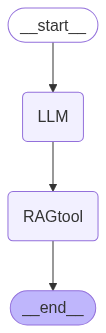

In [97]:
display(Image(app2.get_graph().draw_mermaid_png())) 

## Invoke Output:

In [98]:
app2.invoke({"messages":["what is a meaning of 'cancer from prolonged exposure to burn pits ravaged Heath’s lungs and body'?"]})

{'messages': ["what is a meaning of 'cancer from prolonged exposure to burn pits ravaged Heath’s lungs and body'?",
  "It means that Heath's lungs and body were severely damaged by cancer caused by long-term exposure to burn pits.",
  "The phrase 'cancer from prolonged exposure to burn pits ravaged Heath’s lungs and body' refers to a medical condition where an individual named Heath has developed cancer as a result of being exposed over an extended period to burn pits. Burn pits are large areas used in military settings to dispose of waste by burning, and prolonged exposure to the toxic fumes and chemicals released from these pits can lead to serious health issues, including cancer. In this case, the cancer has severely damaged Heath’s lungs and overall physical health."]}

## Stream Output:

#### Comparing the responses between the LLM and the RAG Pipeline:

In [99]:
for output in app2.stream({"messages":["what is a meaning of 'cancer from prolonged exposure to burn pits ravaged Heath’s lungs and body'?"]}):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from LLM
_______
{'messages': ["what is a meaning of 'cancer from prolonged exposure to burn pits ravaged Heath’s lungs and body'?", 'Heath suffered from health issues, specifically lung and body damage, caused by long-term exposure to burn pits.']}


here is output from RAGtool
_______
{'messages': ["what is a meaning of 'cancer from prolonged exposure to burn pits ravaged Heath’s lungs and body'?", 'Heath suffered from health issues, specifically lung and body damage, caused by long-term exposure to burn pits.', "Based on the provided context, the document does not contain information about cancer from prolonged exposure to burn pits. Therefore, I cannot provide an answer to the question about the meaning of 'cancer from prolonged exposure to burn pits ravaged Heath’s lungs and body' using the given text."]}




The responses here shows the AgentState and not the actual responses generated by the LLM or RAG.

In [10]:
loader=DirectoryLoader("../data",glob="./*.txt",loader_cls=TextLoader)
docs=loader.load()
text_splitter=RecursiveCharacterTextSplitter(
    chunk_size=100,
    chunk_overlap=50
)
new_docs = text_splitter.split_documents(documents=docs)
doc_strings = [doc.page_content for doc in new_docs]

In [12]:
new_docs

[Document(metadata={'source': '..\\data\\japan.txt'}, page_content='Industrial revival hope for Japan'),
 Document(metadata={'source': '..\\data\\japan.txt'}, page_content="Japanese industry is growing faster than expected, boosting hopes that the country's retreat back"),
 Document(metadata={'source': '..\\data\\japan.txt'}, page_content="boosting hopes that the country's retreat back into recession is over."),
 Document(metadata={'source': '..\\data\\japan.txt'}, page_content='Industrial output rose 2.1% - adjusted for the time of year - in January from a month earlier. At'),
 Document(metadata={'source': '..\\data\\japan.txt'}, page_content='of year - in January from a month earlier. At the same time, retail sales picked up faster than at'),
 Document(metadata={'source': '..\\data\\japan.txt'}, page_content='same time, retail sales picked up faster than at any time since 1997. The news sent Tokyo shares to'),
 Document(metadata={'source': '..\\data\\japan.txt'}, page_content='time s

In [11]:
doc_strings

['Industrial revival hope for Japan',
 "Japanese industry is growing faster than expected, boosting hopes that the country's retreat back",
 "boosting hopes that the country's retreat back into recession is over.",
 'Industrial output rose 2.1% - adjusted for the time of year - in January from a month earlier. At',
 'of year - in January from a month earlier. At the same time, retail sales picked up faster than at',
 'same time, retail sales picked up faster than at any time since 1997. The news sent Tokyo shares to',
 'time since 1997. The news sent Tokyo shares to an eight-month high, as investors hoped for a',
 'to an eight-month high, as investors hoped for a recovery from the three quarters of contraction',
 'a recovery from the three quarters of contraction seen from April 2004 on. The Nikkei 225 index',
 'seen from April 2004 on. The Nikkei 225 index ended the day up 0.7% at 11,740.60 points, with the',
 'the day up 0.7% at 11,740.60 points, with the yen strengthening 0.7% again

In [14]:
db = Chroma.from_documents(new_docs, embeddings)

retriever = db.as_retriever(search_kwargs={"k": 3})

In [16]:
query = "Tell me about India's Industrial Growth?"
docs = retriever.get_relevant_documents(query)
print(docs[0].metadata)
print(docs[0].page_content)

{'source': '..\\data\\japan.txt'}
Japan's last four year GDP:


In [17]:
docs

[Document(metadata={'source': '..\\data\\japan.txt'}, page_content="Japan's last four year GDP:"),
 Document(metadata={'source': '..\\data\\japan.txt'}, page_content='quarters of shrinking GDP. Only an exceptionally strong performance in the early months of 2004'),
 Document(metadata={'source': '..\\data\\japan.txt'}, page_content='Industrial revival hope for Japan')]

In [18]:
from typing import TypedDict, Annotated,Sequence

In [19]:
import operator

In [20]:
from langchain_core.messages import BaseMessage

In [ ]:
from langchain.prompts import PromptTemplate

In [25]:
AgentState

{'messages': []}

In [128]:
state={"messages":["hi","how are you?","what is a japan GDP?","which is good model in llm world?"]}

In [ ]:
#last message inside the message list
state["messages"][-1]

'which is good model in llm world?'

In [ ]:
#first message from the message list
state["messages"][0]

'hi'

In [26]:
class AgentState(TypedDict):
    messages:Annotated[Sequence[BaseMessage],operator.add]

In [33]:
from langchain_core.messages import HumanMessage

In [34]:
state=AgentState(messages=[HumanMessage(content="hi there")])

In [35]:
state

{'messages': [HumanMessage(content='hi there', additional_kwargs={}, response_metadata={})]}

In [36]:
state=AgentState(messages=["hi"])

In [37]:
state

{'messages': ['hi']}

In [38]:
from pydantic import BaseModel, Field

In [39]:
class TopicSelectionParser(BaseModel):
    Topic:str=Field(description="selected topic")
    Reasoning:str=Field(description="reasoning behind the topic")

In [132]:
pydantic_obj=TopicSelectionParser(Topic="india", Reasoning="india is growing country?")

In [134]:
pydantic_obj.Topic

'india'

In [135]:
pydantic_obj.Reasoning

'india is growing country?'

In [40]:
from langchain.output_parsers import PydanticOutputParser

In [41]:
parser=PydanticOutputParser(pydantic_object=TopicSelectionParser)

In [42]:
print(parser.get_format_instructions())

The output should be formatted as a JSON instance that conforms to the JSON schema below.

As an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}
the object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.

Here is the output schema:
```
{"properties": {"Topic": {"description": "selected topic", "title": "Topic", "type": "string"}, "Reasoning": {"description": "reasoning behind the topic", "title": "Reasoning", "type": "string"}}, "required": ["Topic", "Reasoning"]}
```


In [ ]:
def function_1(state:AgentState):
    
    message=state["messages"]
    
    question=message[-1] 
    
    print("***********here is my question********")
    print(question)
    
    template="""
    Your task is to classify the given user query into one of the following categories: [Japan, Not Related]. 
    Only respond with the category name and nothing else.

    User query: {question}
    
    {format_instructions}
    """
    
    prompt = PromptTemplate(template=template,
                            input_variables=[question],
                            partial_variables={"format_instructions" : parser.get_format_instructions()}
                            )
    
    chain =prompt | llm | parser
    
    response = chain.invoke({"question":question,"format_instructions" : parser.get_format_instructions() })
    
    print("***********my response********")
    print(response)
    
    return {"messages":[response.Topic]}

In [87]:
state={"messages":["tell me about the japan's industrial growth?"]}

In [85]:
state={"messages":["hi how are you?"]}

In [88]:
function_1(state)

***********my question********
tell me about the japan's industrial growth?
***********my response********
Topic='Japan' Reasoning="The query explicitly asks about Japan's industrial growth."


{'messages': ['Japan']}

In [150]:
def router(state:AgentState):
    print("***********entering into router********")
    print("*********my state from router********")
    print(state)
    
    message=state["messages"]
    
    last_message=message[-1]
    
    print("***********last message********")    
    print(last_message)
    
    if "Japan" in last_message:
        return "RAG Call"
    else:
        return "Simple LLM Call"

In [151]:
def function_2(state:AgentState):
    print("*********my state from function_2(rag)********")
    print(state)
    
    
    print('-> Calling RAG ->')
    
    messages = state['messages']
    
    question = messages[0] ## Fetching the user question
    
    print(question)

    template = """Answer the question based only on the following context:
    {context}

    Question: {question}
    """
    prompt = ChatPromptTemplate.from_template(template)
    
    print(prompt)

    retrieval_chain = (
        {"context": retriever, "question": RunnablePassthrough()}
        | prompt
        | llm
        | StrOutputParser()
        )
    result = retrieval_chain.invoke(question)
    response={"messages": [result]}
    print("*********my state from function_2(rag)********")
    print(state)
    return response
    

In [152]:
def function_3(state:AgentState):
    print('-> Calling LLM ->')

    messages = state['messages']
    
    question = messages[0] ## Fetching the user question

    # Normal LLM call
    complete_query = "Anwer the follow question with your knowledge of the real world. Following is the user question: " + question
    response = llm.invoke(complete_query)
    response={"messages": [response.content]}
    print("*********my state from function_3(LLM)********")
    print(state)
    return response

In [153]:
from langgraph.graph import StateGraph, END

In [154]:
workflow=StateGraph(AgentState)

In [155]:
workflow.add_node("supervisor",function_1)

In [156]:
workflow.add_node("RAG",function_2)

In [157]:
workflow.add_node("LLM",function_3)

In [158]:
workflow.set_entry_point("supervisor")

In [159]:
workflow.add_conditional_edges(
    "supervisor",
    router,
    {
        "RAG Call": "RAG",
        "Simple LLM Call": "LLM"
    },
    
)

In [160]:
workflow.add_edge("RAG",END)


workflow.add_edge("LLM",END)


app=workflow.compile()

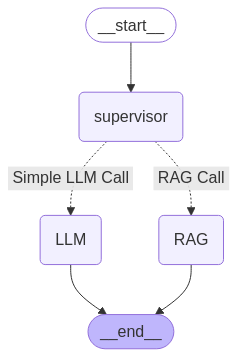

In [161]:
display(Image(app.get_graph().draw_mermaid_png()))

In [162]:
response=app.invoke({"messages":["can you tell me about the japan industrial growth with GDP?"]})

***********my question********
can you tell me about the japan industrial growth with GDP?
***********my response********
Topic='Japan' Reasoning="The query explicitly asks about Japan's industrial growth and GDP."
***********entering into router********
*********my state from router********
{'messages': ['can you tell me about the japan industrial growth with GDP?', 'Japan']}
***********last message********
Japan
*********my state from function_2(rag)********
{'messages': ['can you tell me about the japan industrial growth with GDP?', 'Japan']}
-> Calling RAG ->
can you tell me about the japan industrial growth with GDP?
input_variables=['context', 'question'] input_types={} partial_variables={} messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'question'], input_types={}, partial_variables={}, template='Answer the question based only on the following context:\n    {context}\n\n    Question: {question}\n    '), additional_kwargs={})]
*********my st

In [163]:
response

{'messages': ['can you tell me about the japan industrial growth with GDP?',
  'Japan',
  'Japan experienced three quarters of contraction starting from April 2004, followed by a recovery.  There is also mention of "industrial revival hope".  However, no specific GDP figures or their relationship to industrial growth are provided.']}

In [111]:
response["messages"][-1]

"Japan experienced three quarters of contraction starting from April 2004, followed by a recovery. There are hopes for an industrial revival.  The provided context doesn't give specific GDP numbers or link the recovery directly to industrial growth."

In [125]:
response=app.invoke({"messages":["hi how are you?"]})

***********my question********
hi how are you?
***********my response********
Topic='Not Related' Reasoning='The query is a general greeting and does not mention Japan or any related topics.'
***********my router********
***********last message********
Not Related
-> Calling LLM ->


In [126]:
response["messages"][-1]

"I'm doing well, thank you for asking! How are you?"

In [127]:
for output in app.stream({"messages":["what is a age of donald trump?"]}):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

***********my question********
what is a age of donald trump?
***********my response********
Topic='Not Related' Reasoning="The query asks about Donald Trump's age, which has no relation to Japan."
***********my router********
***********last message********
Not Related
here is output from supervisor
_______
{'messages': ['Not Related']}


-> Calling LLM ->
here is output from LLM
_______
{'messages': ['Donald Trump was born on June 14, 1946.  Therefore, as of October 26, 2023, he is 77 years old.']}




In [ ]:
very useful method for routing in multiagent system
command()